In [1]:
import os
import json
import pandas as pd
import numpy as np
from urllib.parse import urlencode
import requests
import codecs
import time
import datetime

In [2]:
from DataRead import Read
from Tactic import MACD, SMA, MultiTacs

In [3]:
read=Read()
kline=read.read_kline(freq_type='1d',market='BTCUSDT')
s_date='2022-5-1'
e_date='2022-10-19'
short_flag = True

In [4]:
multi_tacs=MultiTacs()
tacs=['SMA','DEA','EMA']
df_multi_tac_returns=multi_tacs.multi_tac_returns(kline,tacs=tacs, start=s_date, end=e_date,short_flag=short_flag)

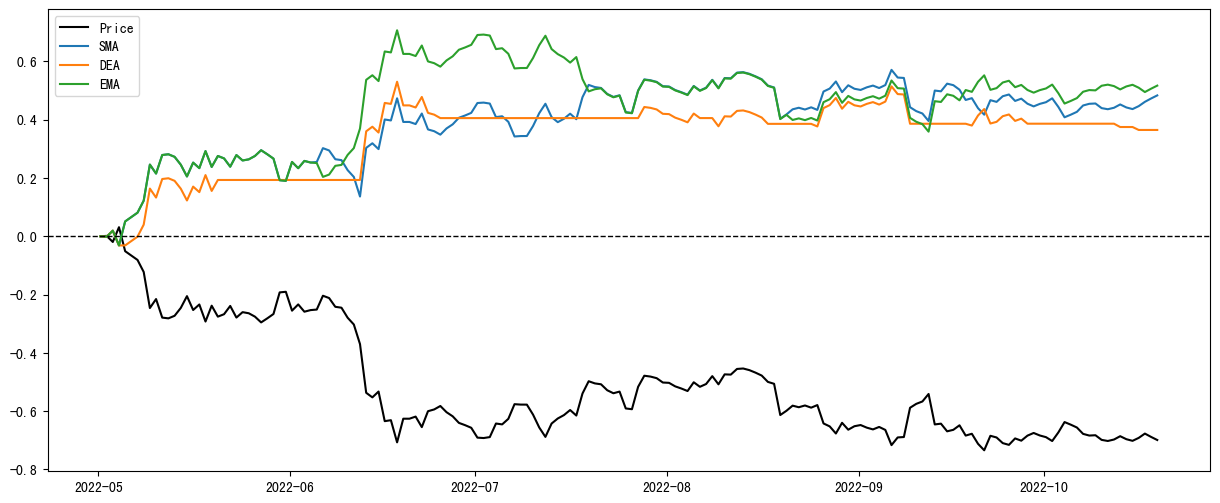

In [5]:
multi_tacs.plot_multi_tac_returns(kline,tacs=tacs, start=s_date, end=e_date,short_flag=short_flag)

In [6]:
sma=SMA()
df_sma=sma.sma_tac(df=kline,enable_short=short_flag)
df_sma=df_sma.loc[s_date:e_date].copy()
df_sma=sma.complete_returns(df_sma)
# sma.plot_sma_return(df=df_sma,start=s_date,end=e_date)
sma.trade_call(df_sma)

Trade Date:  2022-10-19 08:00:00
Position:  Sell
Quote Price:  19327.44


In [7]:
macd=MACD()
df=macd.dea_tac(df=kline,enable_short=short_flag)
df=df.loc[s_date:e_date].copy()
df=macd.complete_returns(df)
# macd.plot_dea_return(df=df,start=s_date,end=e_date)
macd.trade_call(df)

Trade Date:  2022-10-19 08:00:00
Position:  Close Out


In [8]:
macd=MACD()
df_ema=macd.ema_tac(df=kline,enable_short=short_flag)
df_ema=df_ema.loc[s_date:e_date].copy()
df_ema=macd.complete_returns(df_ema)
# macd.plot_dea_return(df=df,start=s_date,end=e_date)
macd.trade_call(df_ema)

Trade Date:  2022-10-19 08:00:00
Position:  Sell
Quote Price:  19327.44
